The source of the algorithm is inside several .py files. Accessing through bovw's run method we can configure the execution in order to iterate over the desired parameters. If a parameter has exactly one value, only that will be use. If it has tree, a np.linspace will be created with them.

In [3]:
from bovw import run

Default method to run the experiments

In [7]:
from argparse import Namespace
import numpy as np
from matplotlib import pyplot as plt

def run_experiment(method=('sift',), n_features=(300,), step_size=(16,), n_clusters=(128,), n_neighbors=(5,), distance=(
'euclidean',)):
    args = Namespace(train_path='../data/MIT_split/train',
                     test_path='../data/MIT_split/test',
                     method=method,
                     n_features=n_features,
                     step_size=step_size,
                     n_clusters=n_clusters,
                     n_neighbors=n_neighbors,
                     distance=distance)
    return run(args)


Test different amounts of local features over SIFT.

method: sift, n_features: 100, step_size: 16
extract train descriptors: 17.902287s
extract test descriptors: 7.625538s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 4.637516s
method: sift, n_features: 200, step_size: 16
extract train descriptors: 22.108912s
extract test descriptors: 11.463330s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 7.193696s
method: sift, n_features: 300, step_size: 16
extract train descriptors: 29.198642s
extract test descriptors: 16.942751s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 10.436658s
method: sift, n_features: 400, step_size: 16
extract train descriptors: 31.382071s
extract test descriptors: 15.926901s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 11.278377s
method: sift, n_features: 500, step_size: 16
extract train descriptors: 34.794859s
extract test descriptors: 13.349726s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 9.735883s
method: sift, n_features: 600, ste

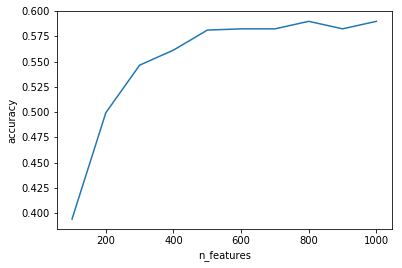

In [8]:
results = run_experiment(n_features=[100, 1000, 10])
plt.plot(results['n_features'], results['accuracy'])
plt.xlabel('n_features')
plt.ylabel('accuracy')
plt.show()

The accuracy from 500 features onwards is more or less constant.

SIFT vs DenseSIFT.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 26.532505s
extract test descriptors: 16.542740s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 10.403633s
method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 272.073663s
extract test descriptors: 110.206715s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 8.365322s


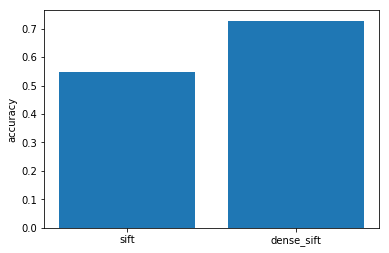

In [10]:
results = run_experiment(method=['sift', 'dense_sift'])
x = np.arange(2)
plt.bar(x, results['accuracy'])
plt.xticks(x, results['method'])
plt.ylabel('accuracy')
plt.show()

In the graph above, we can crearly observer how dense_sift outperforms sift.

Test different amounts of codebook sizes k.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 46.595155s
extract test descriptors: 26.661724s
n_clusters: 80, n_neighbors: 5, distance: euclidean
classify: 5.824165s
n_clusters: 90, n_neighbors: 5, distance: euclidean
classify: 7.114716s
n_clusters: 100, n_neighbors: 5, distance: euclidean
classify: 7.350647s
n_clusters: 110, n_neighbors: 5, distance: euclidean
classify: 7.710569s
n_clusters: 120, n_neighbors: 5, distance: euclidean
classify: 8.437291s
n_clusters: 130, n_neighbors: 5, distance: euclidean
classify: 10.087770s
n_clusters: 140, n_neighbors: 5, distance: euclidean
classify: 10.403669s
n_clusters: 150, n_neighbors: 5, distance: euclidean
classify: 11.240402s
n_clusters: 160, n_neighbors: 5, distance: euclidean
classify: 11.327374s
n_clusters: 170, n_neighbors: 5, distance: euclidean
classify: 11.993160s
method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 262.157051s
extract test descriptors: 114.142533s
n_clusters: 80, n_n

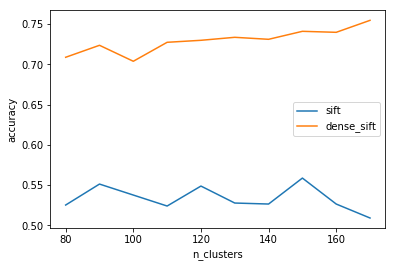

In [13]:
results = run_experiment(method=['sift', 'dense_sift'], n_clusters=[80, 170, 10])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
plt.plot(results_sift['n_clusters'], results_sift['accuracy'], label='sift')
plt.plot(results_dense_sift['n_clusters'], results_dense_sift['accuracy'], label='dense_sift')
plt.xlabel('n_clusters')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Test different values of k for the k-nn classifier.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 52.186525s
extract test descriptors: 28.859680s
n_clusters: 128, n_neighbors: 3, distance: euclidean
classify: 10.008792s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 10.985500s
n_clusters: 128, n_neighbors: 7, distance: euclidean
classify: 10.176724s
n_clusters: 128, n_neighbors: 9, distance: euclidean
classify: 10.531525s
n_clusters: 128, n_neighbors: 11, distance: euclidean
classify: 10.504840s
n_clusters: 128, n_neighbors: 13, distance: euclidean
classify: 11.223222s
n_clusters: 128, n_neighbors: 15, distance: euclidean
classify: 10.259715s
n_clusters: 128, n_neighbors: 17, distance: euclidean
classify: 10.237722s
n_clusters: 128, n_neighbors: 19, distance: euclidean
classify: 10.152749s
n_clusters: 128, n_neighbors: 21, distance: euclidean
classify: 10.428661s
method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 296.141063s
extract test descriptors: 127.687011s
n_clus

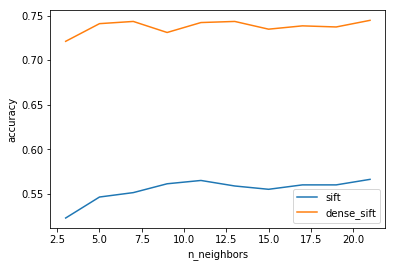

In [15]:
results = run_experiment(method=['sift', 'dense_sift'], n_neighbors=[3, 21, 10])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
plt.plot(results_sift['n_neighbors'], results_sift['accuracy'], label='sift')
plt.plot(results_dense_sift['n_neighbors'], results_dense_sift['accuracy'], label='dense_sift')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Test different distances for the k-nn classifier.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 49.930168s
extract test descriptors: 28.103135s
n_clusters: 128, n_neighbors: 5, distance: euclidean
classify: 10.254057s
n_clusters: 128, n_neighbors: 5, distance: manhattan
classify: 10.279459s
n_clusters: 128, n_neighbors: 5, distance: chebyshev
classify: 10.231800s


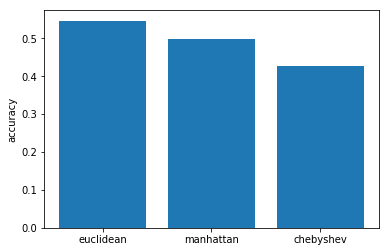

In [16]:
results = run_experiment(distance=['euclidean', 'manhattan', 'chebyshev'])
x = np.arange(3)
plt.bar(x, results['accuracy'])
plt.xticks(x, results['distance'])
plt.ylabel('accuracy')
plt.show()